In [1]:
import desc.monitor
import os
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

/global/common/cori/contrib/lsst/lsstDM/v12_1/Linux64/sims_catalogs/master-g89e82bbb01+1/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/global/common/cori/contrib/lsst/lsstDM/v12_1/Linux64/sims_catalogs/master-g89e82bbb01+1/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/global/common/cori/contrib/lsst/lsstDM/v12_1/Linux64/sims_catalogs/master-g89e82bbb01+1/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 4 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id va

#### Build lightcurve from database

Once an ssh tunnel is setup (see [here](https://github.com/LSSTDESC/Monitor#setting-up-ssh-tunnel-for-database-access)) then one can use the build_lightcurve_from_db routine or connect to the database to find possible targets.

In [2]:
#Setup a database connection directly
dbConn = desc.monitor.dbConnection.dbInterface(database='DESC_Twinkles_Level_2',
                                               #if running from ssh-tunnel uncomment below
                                               #host='localhost', port=3307,
                                               #or if running jupyter-dev uncomment below
                                               host='scidb1.nersc.gov', port=3306,
                                               driver='mysql')
lc = desc.monitor.LightCurve(dbConn)

In [3]:
#Find possible targets
ra_dec = (52.9229255, -27.45597951)
possible_targets = dbConn.objectFromRaDec(ra_dec[0], ra_dec[1], tol=0.001)
print possible_targets

[(6425, 0, 52.92293601, -27.45599306)
 (48253, 6425, 52.9229255, -27.45597951)
 (48254, 6425, 52.92313084, -27.4562537)]


In [4]:
obj_id = 48253
lc.build_lightcurve_from_db(objid = obj_id)

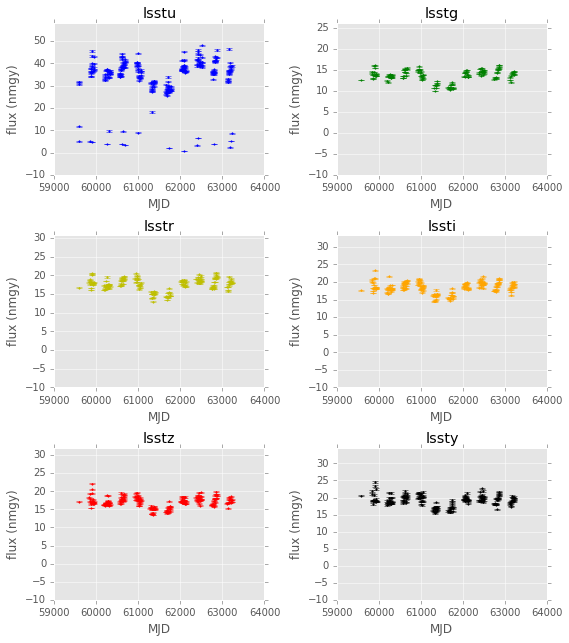

In [5]:
fig = lc.visualize_lightcurve()
plt.tight_layout()